In [3]:
!pip install -q kaggle
!pip install -q keras

In [4]:
import keras


In [5]:
from google.colab import files



In [6]:
import os
import cv2
import random
import pickle
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import utils
from sklearn.model_selection import train_test_split

In [7]:
DATA_DIR_TRAIN = '/content/drive/MyDrive/Datasets/X-rays/'
DATA_DIR_TEST = '/content/drive/MyDrive/Datasets/X-rays'



TRAIN_DATA_DIR = os.path.join(DATA_DIR_TRAIN, 'train')
TEST_DATA_DIR = os.path.join(DATA_DIR_TEST, 'test')


In [8]:
IMG_SIZE = 64
CATEGORIES = []

for i in os.listdir(TRAIN_DATA_DIR):
    CATEGORIES.append(i)
    
print(CATEGORIES)

['No_findings', 'Pneumonia', 'Covid-19']


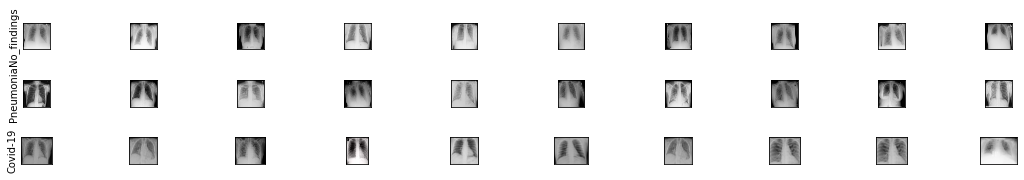

In [9]:
plt.figure(figsize=(15,4))
i=0
for c in CATEGORIES:  
    path = os.path.join(TRAIN_DATA_DIR,c)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.subplot(5,10,i+1)
        plt.imshow(img_array)
        if i%10 == 0:
            plt.ylabel(c)
        plt.xticks([])
        plt.yticks([])
        i += 1
        if i%10 == 0:
            break

plt.tight_layout()        
plt.show()


In [10]:
training_data = []

for c in CATEGORIES:
    path = os.path.join(TRAIN_DATA_DIR, c) 
    class_num = CATEGORIES.index(c) 
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))   
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
            training_data.append([img_resized, class_num]) 
        except Exception as e:
            pass

print(len(training_data))

100%|██████████| 182/182 [00:04<00:00, 36.49it/s]

742


In [11]:
test_data = []

for c in CATEGORIES:
    path = os.path.join(TEST_DATA_DIR, c) 
    class_num = CATEGORIES.index(c) 
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))   
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
            test_data.append([img_resized, class_num])
        except Exception as e:
            pass
print(len(test_data))

100%|██████████| 21/21 [00:04<00:00,  5.06it/s]

91


In [12]:
random.shuffle(training_data)
random.shuffle(test_data)



In [13]:
X_train = []
Y_train = []

for img, label in training_data:
    X_train.append(img)
    Y_train.append(label)
    
X_train = np.array(X_train).astype('float32').reshape(-1,64,64,3)
Y_train = np.array(Y_train)

print(f"X_train= {X_train.shape} Y_train= {Y_train.shape}")

X_train= (742, 64, 64, 3) Y_train= (742,)


In [14]:
X_test = []
Y_test = []

for features,label in test_data:
    X_test.append(features)
    Y_test.append(label)

X_test = np.array(X_test).astype('float32').reshape(-1, IMG_SIZE, IMG_SIZE, 3)
Y_test = np.array(Y_test)

print(f"X_test= {X_test.shape} Y_test= {Y_test.shape}")

X_test= (91, 64, 64, 3) Y_test= (91,)


(742, 64, 64, 3) (742,)


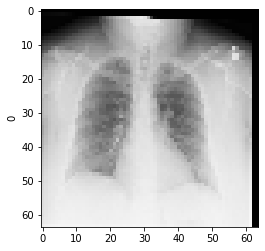

In [15]:
X_train = []
Y_train = []
for img,label in training_data:
    X_train.append (img)
    Y_train.append (label)

X_train = np.array(X_train).astype('float32').reshape (-1,64,64,3)
Y_train = np.array (Y_train)

print (X_train.shape, Y_train.shape)
plt.figure()
plt.imshow(X_train[700].astype('uint8'))
plt.ylabel(Y_train[700])
plt.show()

(742, 64, 64, 3) (742,)


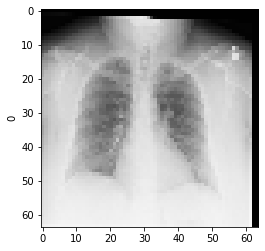

In [16]:
X_train = []
Y_train = []
for img,label in training_data:
    X_train.append (img)
    Y_train.append (label)

X_train = np.array(X_train).astype('float32').reshape (-1,64,64,3)
Y_train = np.array (Y_train)

print (X_train.shape, Y_train.shape)
plt.figure()
plt.imshow(X_train[700].astype('uint8'))
plt.ylabel(Y_train[700])
plt.show()

In [17]:
mean_rgb = np.mean(X_train, axis=(0,1,2))
print(mean_rgb)

[140.91612 140.75949 140.7566 ]


In [18]:
X_train_norm = np.empty_like(X_train)
X_test_norm = np.empty_like(X_test)


In [19]:
for i in range(len(X_train)):
    for c in range(3):
        if(c==1):
            X_train_norm[i,:, :, c] = X_train[i,:, :, c] - mean_rgb[0]
        elif(c==2):
            X_train_norm[i,:, :, c] = X_train[i,:, :, c] - mean_rgb[1]
        else:
            X_train_norm[i,:, :, c] = X_train[i,:, :, c] - mean_rgb[2]
            
for i in range(len(X_test)):
    for c in range(3):
        if(c==1):
            X_test_norm[i,:, :, c] = X_test[i,:, :, c] - mean_rgb[0]
        elif(c==2):
            X_test_norm[i,:, :, c] = X_test[i,:, :, c] - mean_rgb[1]
        else:
            X_test_norm[i,:, :, c] = X_test[i,:, :, c] - mean_rgb[2]

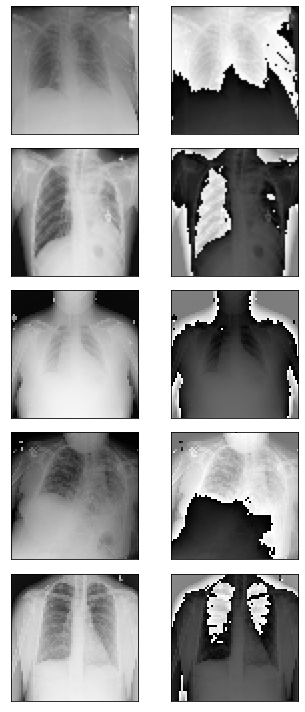

In [20]:
c = 0
plt.figure(figsize=(5,10))
for i in range(5):
    plt.subplot(5,2,c+1)
    plt.imshow(X_train[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(5,2,c+2)
    plt.imshow(X_train_norm[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])

    c += 2
    
plt.tight_layout()
plt.show()

In [138]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
model = keras.Sequential([
    
    keras.Input(shape=X_train_norm.shape[1:]),

    
    
    layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    
    
    
    layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    
    
    
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    
    
    
    layers.Flatten(),
    
    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    
    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),

    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    
    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    
    layers.Dense(10),
    layers.Activation('softmax')
])

model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_228 (Conv2D)         (None, 64, 64, 32)        896       
                                                                 
 activation_300 (Activation)  (None, 64, 64, 32)       0         
                                                                 
 conv2d_229 (Conv2D)         (None, 64, 64, 64)        18496     
                                                                 
 activation_301 (Activation)  (None, 64, 64, 64)       0         
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_230 (Conv2D)         (None, 32, 32, 128)       73856     
                                                     

In [139]:
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.0005), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [140]:
cb = EarlyStopping(monitor='val_loss', min_delta=0.02, patience=3, restore_best_weights=True)

h = model.fit(x=X_train_norm, y=Y_train, 
              epochs=20, 
              validation_split=0.2,
              batch_size=32,
              callbacks=[cb]
             )

Epoch 1/20
19/19 [==============================] - 6s 205ms/step - loss: 28.1885 - accuracy: 0.3693 - val_loss: 1.1854 - val_accuracy: 0.3624
Epoch 2/20
19/19 [==============================] - 3s 179ms/step - loss: 1.1528 - accuracy: 0.3541 - val_loss: 1.1414 - val_accuracy: 0.4027
Epoch 3/20
19/19 [==============================] - 3s 170ms/step - loss: 1.2931 - accuracy: 0.4030 - val_loss: 1.2743 - val_accuracy: 0.3624
Epoch 4/20
19/19 [==============================] - 3s 179ms/step - loss: 1.1398 - accuracy: 0.3693 - val_loss: 0.9545 - val_accuracy: 0.4564
Epoch 5/20
19/19 [==============================] - 3s 171ms/step - loss: 1.0713 - accuracy: 0.4132 - val_loss: 2.7487 - val_accuracy: 0.4564
Epoch 6/20
19/19 [==============================] - 3s 171ms/step - loss: 1.3708 - accuracy: 0.3845 - val_loss: 1.0573 - val_accuracy: 0.4295
Epoch 7/20
19/19 [==============================] - 3s 180ms/step - loss: 0.9045 - accuracy: 0.5396 - val_loss: 0.6938 - val_accuracy: 0.6107
Epoch

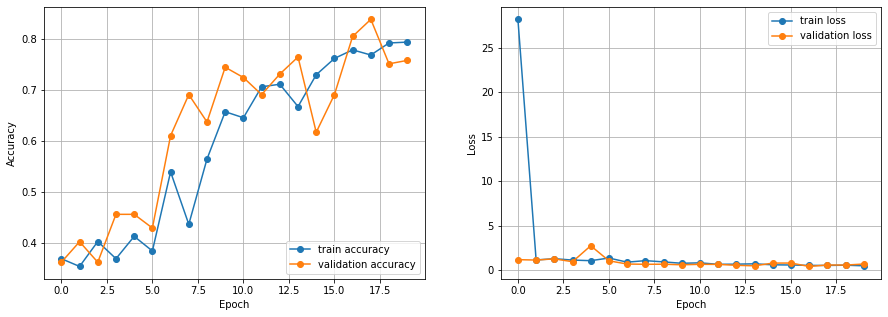

In [141]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [142]:
test_loss, test_acc = model.evaluate(X_test_norm, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

3/3 [==============================] - 0s 44ms/step - loss: 0.5053 - accuracy: 0.8352

Test Accuracy: 0.8351648449897766

Test Loss: 0.5052633881568909
